# **IBM Course Part 9 - Week 3 - Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto**

## **Assignment 1: Retrieving table with data from Wikipedia and putting it in a Pandas Dataframe**

### **Step 1.1: Import the required libraries**

In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

### **Step 1.2: Go to the Wikipedia page from which the table needs to be imported. Right click on the table and choose "Inspect".**


This gives us the HTML content through which we can find the tags inside which our data is stored. <br /> A table is stored inside the "< table >" tag in HTML (see yellow marked area in the image below).

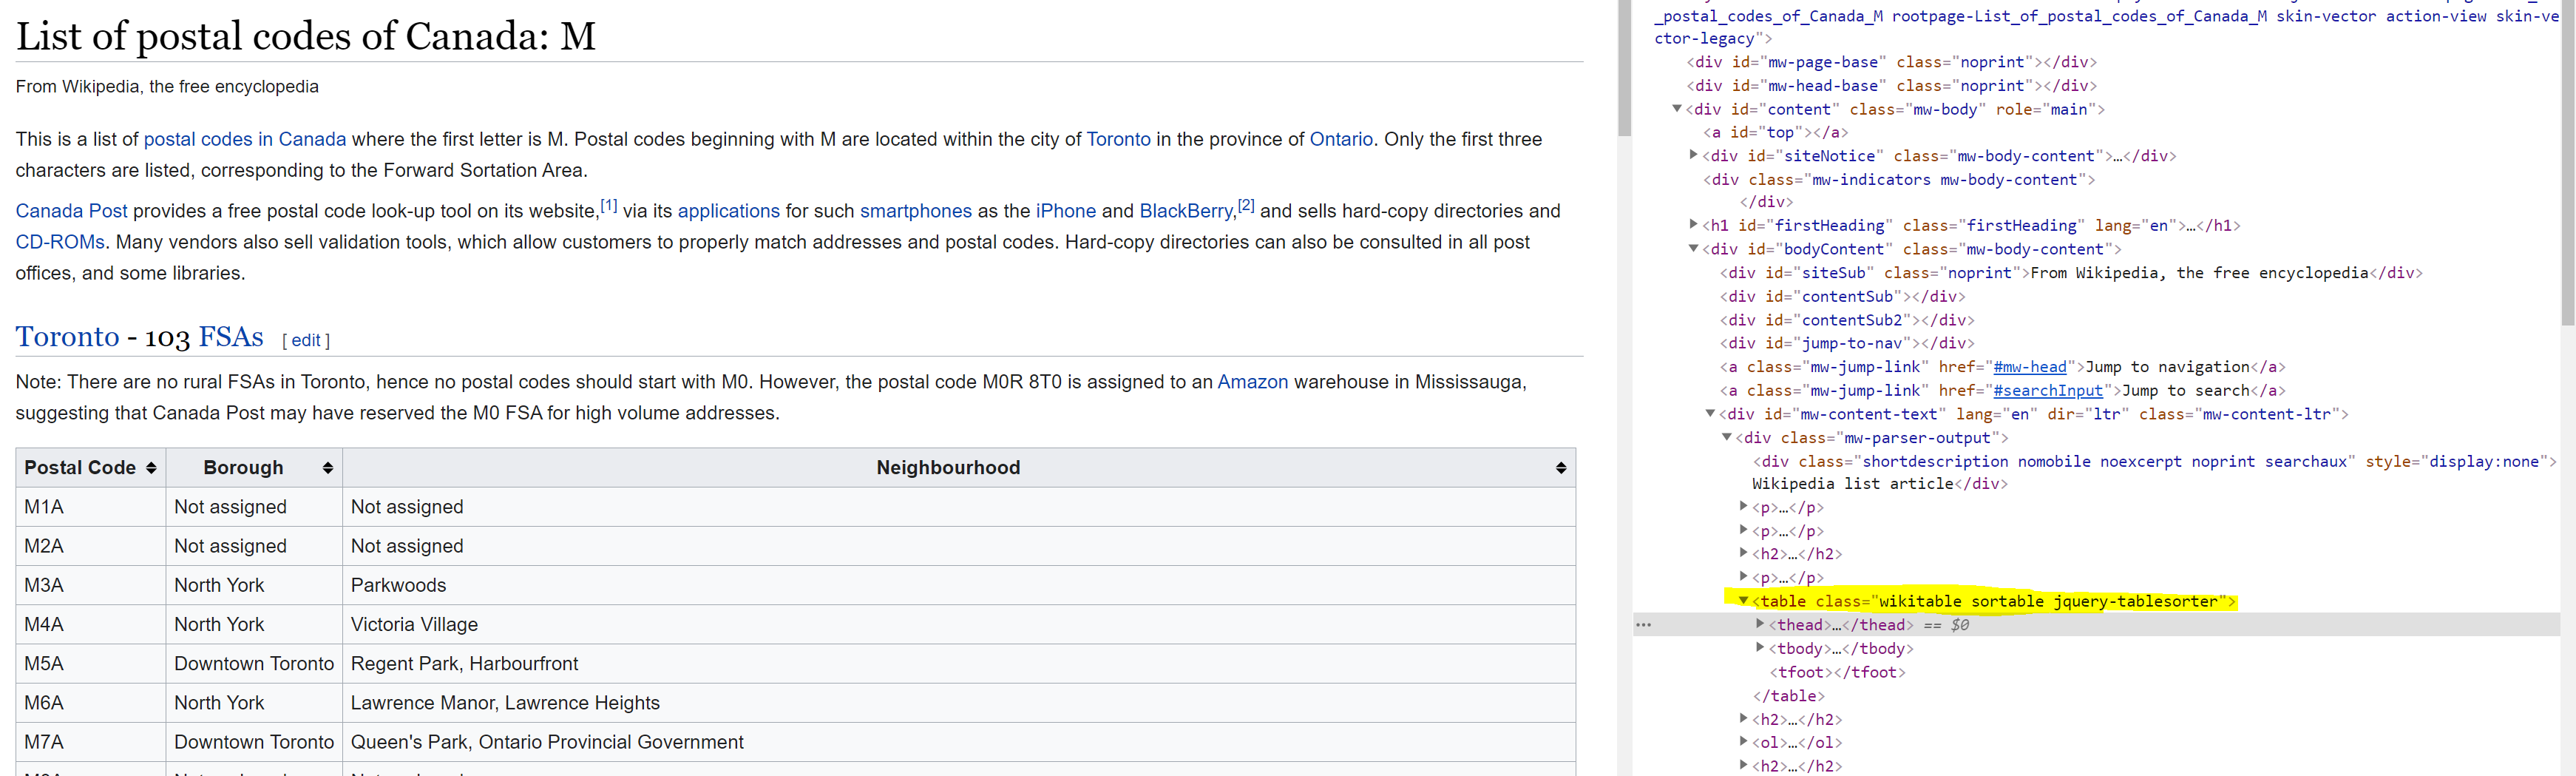

### **Step 1.3: Request for the HTML response using the URL**

Send a GET request to the Wikipedia URL for the table that needs to be scraped and store the HTML response in a variable. <br />
Verify if the status code is '200', which shows that the table can be downloaded. 

In [3]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


### **Step 1.4: Parse data from the HTML website**

A BeautifulSoup object is created. The find() method is used to extract the desired information. In this case that is the "< table >" tag.<br /> As there can be more tables on the same Wikipedia page, a "class" or "id" attribute can be specified from the "< table >" tag. 

In [4]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
PostCodesCanada_Table=soup.find('table',{'class':"wikitable"})

### **Step 1.5: Convert the Wikipedia Table into a Pandas Datafame**

Read the HTML table into a list of dataframe object using read_html(). <br /> This returns a list. Next we convert the list into a DataFrame.

In [5]:
PostCodes_list = pd.read_html(str(PostCodesCanada_Table))
# convert list to dataframe
PostCodes_df = pd.DataFrame(PostCodes_list[0])
PostCodes_df

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                         Neighbourhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                       Not assigned  
178  Mimico NW, The Queensway West, South of Bloor,...  
179                                       Not assigned  

[180 rows x 3 columns]

### **Step 1.6: Format and clean the table as required**

#### To create the desired datafame, the following is required:
1. The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
2. Only process the cells that have an assigned borough. Ignore cells with a borough that is **Not assigned**.
3. More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, <br />you will notice that **M5A** is listed twice and has two neighborhoods: **Harbourfront** and **Regent Park**. <br />These two rows will be combined into one row with the neighborhoods separated with a comma as shown in **row 11** in the above table.
4. If a cell has a borough but a **Not assigned** neighborhood, then the neighborhood will be the same as the borough.
5. In the last cell of your notebook, use the **.shape** method to print the number of rows of your dataframe.

#### **Point 1: Rename column "Postal Code" to "PostalCode"**

In [6]:
PostCodes_df.rename(columns={'Postal Code':'PostalCode'},inplace=True)
PostCodes_df.head()

PostalCode           Borough              Neighbourhood
0        M1A      Not assigned               Not assigned
1        M2A      Not assigned               Not assigned
2        M3A        North York                  Parkwoods
3        M4A        North York           Victoria Village
4        M5A  Downtown Toronto  Regent Park, Harbourfront

#### **Point 2: Remove the rows from the column "Borough" that have a "Not assigned" label.**

In [7]:
PostCodes_df = PostCodes_df[PostCodes_df['Borough'] != 'Not assigned']
PostCodes_df.reset_index(drop = True, inplace = True)
PostCodes_df

PostalCode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
..         ...               ...   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                         Neighbourhood  
0                                            Parkwoods  
1                                     Victoria Village  
2                            Regent Park, Harbourfront  
3                     Lawrence Manor, Lawrence Heights  
4          Queen's Park, Ontario Provincial Government  
..                                                 ...  
98       The Kingsway, Montgomery Road, Old Mill North  
99                                Church and Wellesley  
100  Business reply mail Processing Centre, South C...  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...  
102  Mimico NW, The Queensway West, South of Bloor,...  

[103 rows x 3 columns]

#### **Point 3: Combine Neigbourhoods with same PostalCode.**

The Wikipedia table seems to have combined the Neigboorhoods already and there are no duplicate PostalCodes. <br />
We count the amount of duplicates in the column "PostalCode" and find that there are no duplicates. <br />
The column Neighboorhood already shows multiple neigboorhoods for one Postal Code.

In [8]:
# Count amount of duplicates in column "PostalCode"
len(PostCodes_df['PostalCode'])-len(PostCodes_df['PostalCode'].drop_duplicates())

0

#### **Point 4: Making Neighbourhood same as Borough if Neighbourhood is "Not assigned"**

Verifying if there are any "Not assigned" cases in the column "Neighbourhood".

In [9]:

PostCodes_df[PostCodes_df['Neighbourhood'] == 'Not assigned']

Empty DataFrame
Columns: [PostalCode, Borough, Neighbourhood]
Index: []

There seem to be no "Not assigned labels" in de column "Neighbourhood".

#### **Point 5: Printing the shape of the table**

In [10]:
PostCodes_df.shape

(103, 3)

## **Assignment 2: Obtaining the latitude and longitude coordinates of each neighboorhood**

### **Use the Geocoder package or the csv-file to create dataframe with longitude and latitude values**

We will be using a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data.
<br />(Note: The Geocoder seems to have some problems and can be inaccurate at times)

#### **Step 2.1: Import the csv-file and put it into a pandas dataframe**

In [11]:
url = 'http://cocl.us/Geospatial_data'
LatLong_df = pd.read_csv(url)
LatLong_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

Verify the shape of the dataframe:

In [12]:
LatLong_df.shape

(103, 3)

The PostCodes_df and the LatLong_df tables seem to have the same shape.

#### **Step 2.2: Combining both tables into one table, based on Postal Code.**

In [13]:
LatLong_df.rename(columns={'Postal Code':'PostalCode'},inplace=True)
Toronto_df = pd.merge(PostCodes_df,LatLong_df,on='PostalCode')
Toronto_df

PostalCode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
..         ...               ...   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656  
1                                     Victoria Village  43.725882 -79.315572  
2                            Regent Park, Harbourfront  43.654260 -79.360636  
3                     Lawrence Manor, Lawrence Heights  43.718518 -79.464763  
4          Queen's Park, Ontario Provincial Government  43.662301 -79.389494  
..                                                 ...        ...        ...  
98       The Kingsway, Montgomery Road, Old Mill North  43.653654 -79.506944  
99                                Church and Wellesley  43.665860 -79.383160  
100  Business reply mail Processing Centre, South C...  43.662744 -79.321558  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...  43.636258 -79.498509  
102  Mimico NW, The Queensway West, South of Bloor,...  43.628841 -79.520999  

[103 rows x 5 columns]

# **Assignment 3: Exploring the neighbourhoods in Toronto**

### **Step 3.1: Import the required libraries**

In [14]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image
from IPython.core.display import HTML

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!pip install folium==0.5.0

import folium # plotting library

### **Step 3.2: Obtain latitude and longitude values of Toronto**

In [15]:
address = "Toronto, ON"
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto city are 43.6534817, -79.3839347.


### **Step 3.3: Create a map and visualize all neighbourhoods**

In [16]:
#Create map using latitude and longitude of toronto
Toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

#Add blue circle markers to the map for all Neighborhoods
for lat, lng, borough, Neighbourhood in zip(
        Toronto_df['Latitude'], 
        Toronto_df['Longitude'], 
        Toronto_df['Borough'], 
        Toronto_df['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Toronto_map)  

# resize image and remove white space
from branca.element import Figure
fig = Figure(width=750, height=500)
fig.add_child(Toronto_map)

# Display map
Toronto_map

### **Step 3.4: Filtering on boroughs that contain the word Toronto and map part of Toronto City**

#### **Creating dataframe including only Boroughs with the word "Toronto"**

In [17]:
Toronto_filtered_df = Toronto_df[Toronto_df['Borough'].str.contains("Toronto")].reset_index(drop=True)
Toronto_filtered_df.head()

PostalCode           Borough                                Neighbourhood  \
0        M5A  Downtown Toronto                    Regent Park, Harbourfront   
1        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   
2        M5B  Downtown Toronto                     Garden District, Ryerson   
3        M5C  Downtown Toronto                               St. James Town   
4        M4E      East Toronto                                  The Beaches   

    Latitude  Longitude  
0  43.654260 -79.360636  
1  43.662301 -79.389494  
2  43.657162 -79.378937  
3  43.651494 -79.375418  
4  43.676357 -79.293031

#### **Making a map including Boroughs with the word "Toronto" only**

In [18]:
#Create map using latitude and longitude of toronto
Toronto_filtered_map = folium.Map(location=[latitude, longitude], zoom_start=11.5)

#Add blue circle markers to the map for all Neighborhoods
for lat, lng, Borough, Neighbourhood in zip(
        Toronto_filtered_df['Latitude'], 
        Toronto_filtered_df['Longitude'], 
        Toronto_filtered_df['Borough'], 
        Toronto_filtered_df['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Toronto_filtered_map)  

# resize image and remove white space
from branca.element import Figure
fig = Figure(width=750, height=500)
fig.add_child(Toronto_filtered_map)

# Display map
Toronto_filtered_map

### **Step 3.5: Specify Foursquare login details**

#### **Below cell code is hidden for privacy reasons.**

In [19]:
# @hidden_cell
CLIENT_ID = 'BOIV14ENXXHY5CICJ5PNNUKY0DLHUAYSKGGDXYVYCKDPVHBE' # your Foursquare ID
CLIENT_SECRET = 'DHGIFJZXNBWKFZT1JSEP1IKOLR3KP214SOGALQJERFABQYSP' # your Foursquare Secret
ACCESS_TOKEN = 'ISH4WNVVUK3XOHJDWWGZ30VQMA5CXYXSGZVCNTSGHT2ZPAH1' # your FourSquare Access Token
VERSION = '20180604'

### **Step 3.6: Exploring just one random neighborhood from the map at previous step, for instance "Berczy Park"**

In this step we will zoom in on just one random neighbourhood in the dataframe "Toronto_filtered_df". <br />
From the map in step 3.4, I just picked one random neighbourhood, which turned out to be "Berczy Park". <br />
In the following sub-steps we are going to plot a top 10 list of events in "Berczy Park".

#### **Obtain coordinates for the neigbourhood "Berczy Park"**

In [20]:
BerczyPark_latitude = Toronto_filtered_df[Toronto_filtered_df['Neighbourhood']=='Berczy Park']['Latitude'].values[0] # neighborhood latitude value
BerczyPark_longitude = Toronto_filtered_df[Toronto_filtered_df['Neighbourhood']=='Berczy Park']['Longitude'].values[0]  # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format('Berczy Park',
                                                               BerczyPark_latitude, 
                                                               BerczyPark_longitude))

Latitude and longitude values of Berczy Park are 43.644770799999996, -79.3733064.


#### **Obtaining the top 100 venues that are within a 500 meter radius from "Berczy Park" and get results in JSON-format**

In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    BerczyPark_latitude, 
    BerczyPark_longitude, 
    radius, 
    LIMIT)

# get the result to a json file
results = requests.get(url).json()

**Function for extracting venue categories**

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Cleaning and structuring JSON-format into a pandas dataframe:**

In [23]:
# Get relevant part of JSON-format
Venues = results['response']['groups'][0]['items']

# flatten JSON
BerczyPark_Nearby_Venues_df = pd.json_normalize(Venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
BerczyPark_Nearby_Venues_df = BerczyPark_Nearby_Venues_df.loc[:, filtered_columns]

# filter the category for each row
BerczyPark_Nearby_Venues_df['venue.categories'] = BerczyPark_Nearby_Venues_df.apply(get_category_type, axis=1)

# clean columns
BerczyPark_Nearby_Venues_df.columns = [col.split(".")[-1] for col in BerczyPark_Nearby_Venues_df.columns]

BerczyPark_Nearby_Venues_df.head(10)

name                     categories  \
0       The Keg Steakhouse + Bar - Esplanade                     Restaurant   
1                                       LCBO                   Liquor Store   
2                             Fresh On Front  Vegetarian / Vegan Restaurant   
3  Hockey Hall Of Fame (Hockey Hall of Fame)                         Museum   
4                                Berczy Park                           Park   
5       St. Lawrence Market (South Building)                 Farmers Market   
6                             D.W. Alexander                   Cocktail Bar   
7                              Eggspectation                 Breakfast Spot   
8       St. Lawrence Market (North Building)                 Farmers Market   
9                        Market Street Catch             Seafood Restaurant   

         lat        lng  
0  43.646712 -79.374768  
1  43.642944 -79.372440  
2  43.647815 -79.374453  
3  43.646974 -79.377323  
4  43.648048 -79.375172  
5  43.648743 -79.371597  
6  43.648333 -79.373826  
7  43.646526 -79.375134  
8  43.648793 -79.371945  
9  43.648501 -79.371808

**Showing the amount of Venue Categories in the neighbourhood "Berczy Park" in Toronto City**

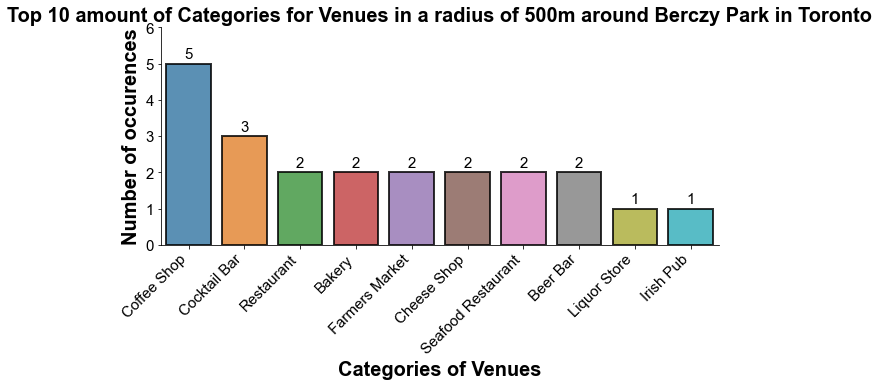

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Counted_Categories = BerczyPark_Nearby_Venues_df['categories'].value_counts()
Counted_Categories = Counted_Categories[:10,]
plt.figure(figsize=(10,4))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Top 10 amount of Categories for Venues in a radius of 500m around Berczy Park in Toronto',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.xlabel('Categories of Venues',fontsize=20, weight = 'bold')
plt.ylabel('Number of occurences',fontsize=20, weight = 'bold')
plt.ylim(0,6)
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()


**Observation:** <br />
It seems that there are plenty of Coffee Shops and Coctail Bars in the vicinty of Berczy Park.

### **Step 3.7: Exploring multiple neighborhoods in Toronto City**

In the following sub-steps we are going to explore the entire Toronto City dataset. <br />
First we will look at the amount of venues for each Neighbourhood to get an idea of where there are a lot of venues. <br />
After that, we will look at the amount of Venue Categories, to obtain some insight in what venues are common en which one are less common.

#### **Creating a new dataframe in which venues for Toronto are imported, using the dataframe 'Toronto_filtered dataframe'.**
**First a function is created for repeating the proces of getting each Venue Categories for each Neighborhood.**

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Apply the function above to each neighbourhood and create an new dataframe.**

In [26]:
Toronto_filtered_nearby_venues_df = getNearbyVenues(names=Toronto_filtered_df['Neighbourhood'],
                                   latitudes=Toronto_filtered_df['Latitude'],
                                   longitudes=Toronto_filtered_df['Longitude']
                                  )

**Let's show part of the table to see how the dataset looks like**

In [27]:
Toronto_filtered_nearby_venues_df.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  Regent Park, Harbourfront                43.65426               -79.360636   
1  Regent Park, Harbourfront                43.65426               -79.360636   
2  Regent Park, Harbourfront                43.65426               -79.360636   
3  Regent Park, Harbourfront                43.65426               -79.360636   
4  Regent Park, Harbourfront                43.65426               -79.360636   

                    Venue  Venue Latitude  Venue Longitude  \
0           Tandem Coffee       43.653559       -79.361809   
1        Roselle Desserts       43.653447       -79.362017   
2  Cooper Koo Family YMCA       43.653249       -79.358008   
3     Body Blitz Spa East       43.654735       -79.359874   
4          Impact Kitchen       43.656369       -79.356980   

        Venue Category  
0          Coffee Shop  
1               Bakery  
2  Distribution Center  
3                  Spa  
4           Restaurant

#### **Showing the amount of venues for each neighbourhood in a bar chart (Note that the limit for amount of venues was set to 100)**

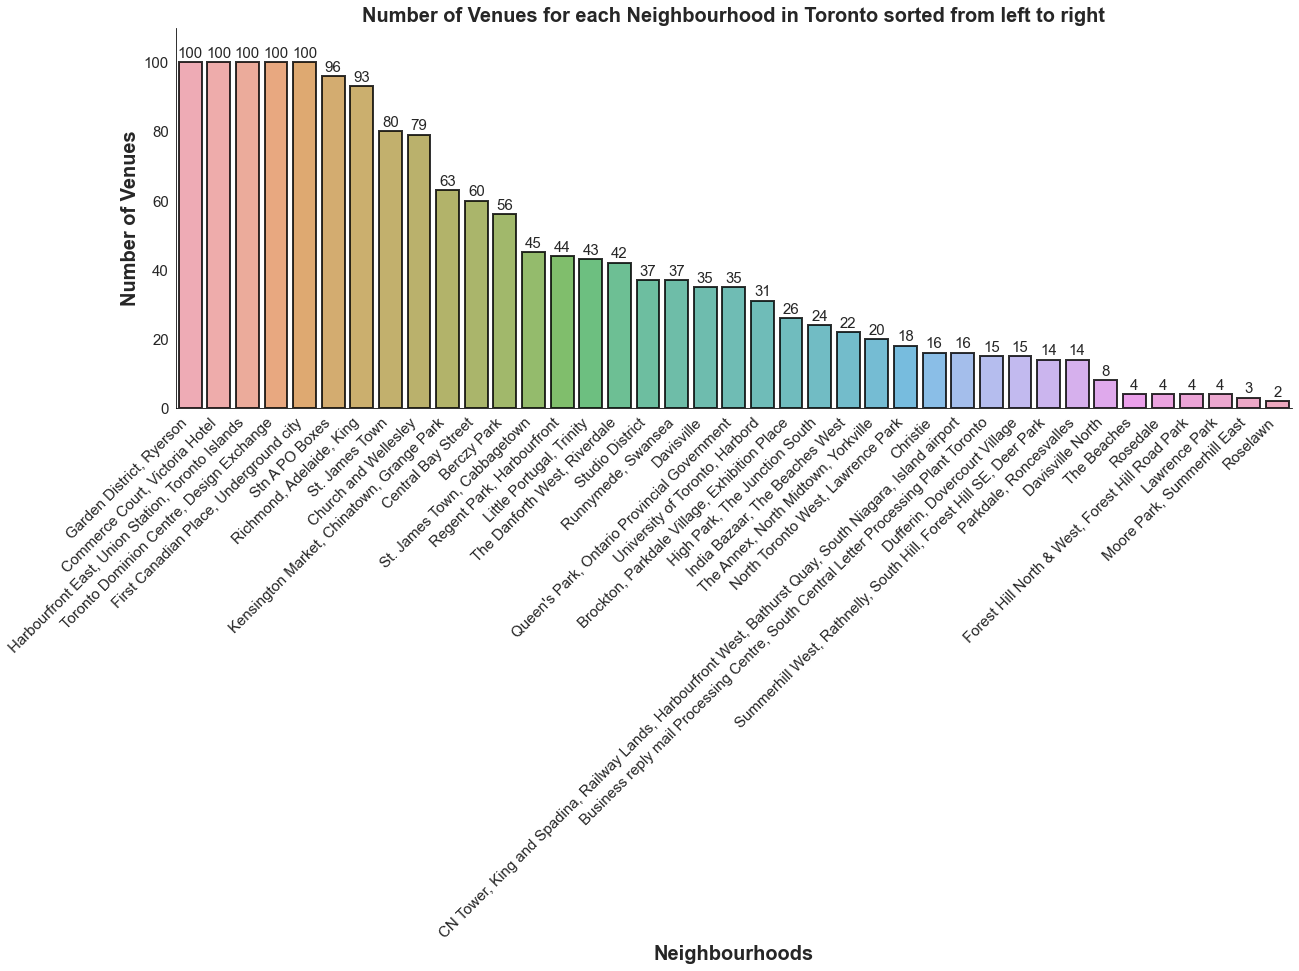

In [28]:
# Importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting column "Neighbourhood" from the dataframe "Toronto_amount_of_venues_per_neighboorhood_df" and counting amount of Neighbourhoods
Counted_Categories = Toronto_filtered_nearby_venues_df['Neighbourhood'].value_counts()
Counted_Categories = Counted_Categories[:40,]

# Creating a Bar Chart
plt.figure(figsize=(20,7))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)

# Adding numbers on top of each bar
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Adding/formatting chart elements 
plt.title('Number of Venues for each Neighbourhood in Toronto sorted from left to right',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.xlabel('Neighbourhoods',fontsize=20, weight = 'bold')
plt.ylabel('Number of Venues',fontsize=20, weight = 'bold')
plt.ylim(0,110)
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()

#### **Showing the amount of Venue Categories in Toronto in a bar chart**

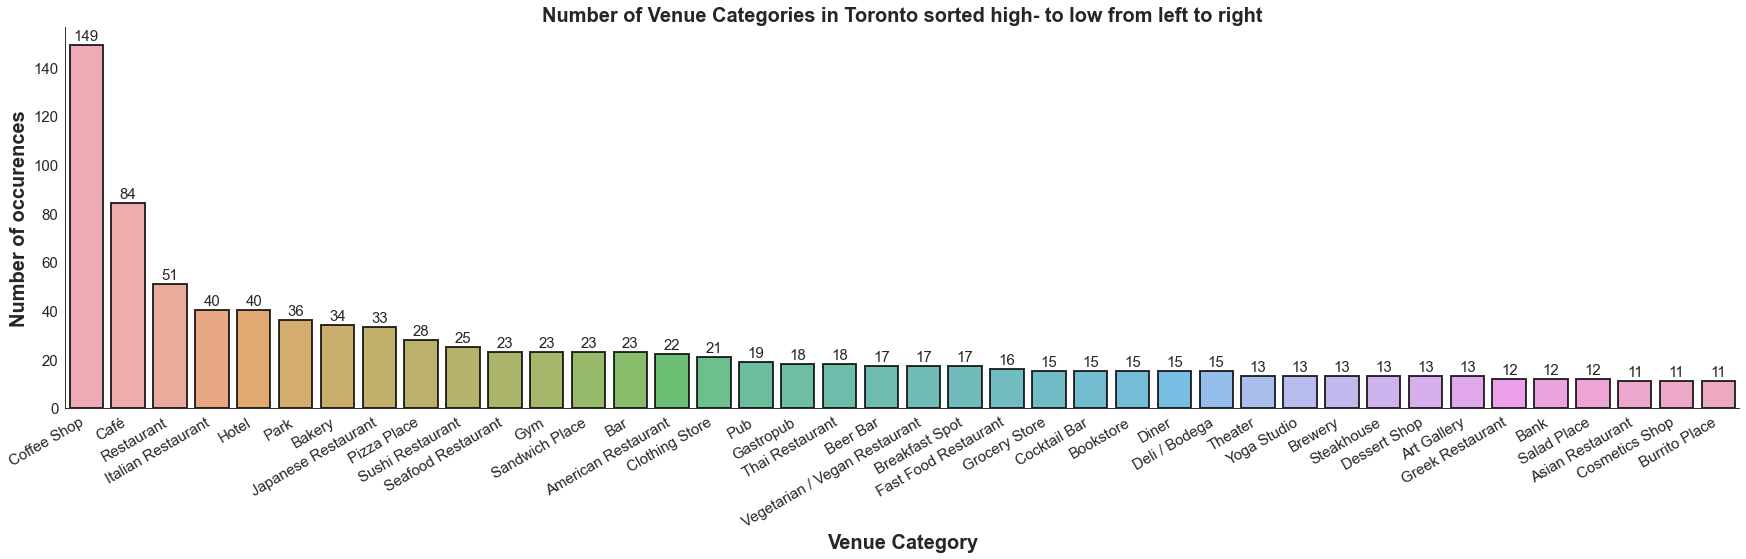

In [29]:
# Count number of Venue Categories
Counted_Categories = Toronto_filtered_nearby_venues_df['Venue Category'].value_counts()
Counted_Categories = Counted_Categories[:40,]

# Create Bar Chart with counted number of Venue Categories
plt.figure(figsize=(30,7))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)

# Adding numbers on top of each bar
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Adding/formatting chart elements
plt.title('Number of Venue Categories in Toronto sorted high- to low from left to right',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, ha='right',fontsize=15)
plt.xlabel('Venue Category',fontsize=20, weight = 'bold')
plt.ylabel('Number of occurences',fontsize=20, weight = 'bold')
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()

**Observation** <br />
The bar-chart shows that among all venue categories, the top 3 are Coffee Shop, Café and Restaurant.

### **Creating a dataframe with the top 10 "Number of Venues" for each Neighbourhood in the dataset of Toronto City**

In [30]:
# Creat new dataframe with "Neighbourhood" and "Venue Category" only. Then count the number of Venues.
Number_of_Venues_df = Toronto_filtered_nearby_venues_df[['Neighbourhood','Venue Category']].copy()  # Create new dataframe from existing one, copying 2 columns
Number_of_Venues_df = Number_of_Venues_df.value_counts().groupby('Neighbourhood').head(10).to_frame('Number of Venues') # Count number of events and add column "Number of Venues"
Number_of_Venues_df.reset_index(drop = False, inplace = True) # Reset dataframe index, thereby keeping the original index (which is "Neighbourhood") as normal column.

# Number_of_Venues_df.sort_values(by=['Neighbourhood','Number of Venues'], ascending = False, inplace = True)
# Number_of_Venues_df.reset_index(drop = True, inplace = True)

# Creating a new dataframe in order to obtain the total number of venues per neighboorhood and sort the dataset based on total number of venues
Tot_no_of_Venues_Neighbourhood_df = Number_of_Venues_df[['Neighbourhood','Number of Venues']].copy()
Tot_no_of_Venues_Neighbourhood_df = Tot_no_of_Venues_Neighbourhood_df.groupby('Neighbourhood')['Number of Venues'].sum().to_frame('Tot. no of Venues per Neighbourhood')
# Tot_no_of_Venues_Neighbourhood_df.sort_values(by=['Neighbourhood'], ascending = False, inplace = True)
Tot_no_of_Venues_Neighbourhood_df.reset_index(drop = False, inplace = True) # Reset dataframe index, thereby keeping the original index (which is"Neighboorhood") as a normal column.

# Merge the two dataframes "Number_of_Venues_df" and "Tot_no_of_Venues_Neighbourhood_df".
# Then sort the dataframe on Total number of Venus per Neighbourhood, then on Neighbourhood and then on Number of Venues.
Number_of_Venues_df = pd.merge(Number_of_Venues_df,Tot_no_of_Venues_Neighbourhood_df,how='left',on='Neighbourhood')
Number_of_Venues_df.sort_values(by=['Tot. no of Venues per Neighbourhood','Neighbourhood','Number of Venues'], ascending = False, inplace = True)

# Reset the index of the dataframe, thereby dropping the current one and adding a new index order.
Number_of_Venues_df.reset_index(drop = True, inplace = True)

# Now the column "Tot. no of Venues per Neighbourhood" is dropped as it is nog needed anymore.
Number_of_Venues_df.drop(columns=['Tot. no of Venues per Neighbourhood'], inplace=True)

Number_of_Venues_df.head()


Neighbourhood       Venue Category  Number of Venues
0  Commerce Court, Victoria Hotel          Coffee Shop                12
1  Commerce Court, Victoria Hotel           Restaurant                 7
2  Commerce Court, Victoria Hotel                Hotel                 6
3  Commerce Court, Victoria Hotel                 Café                 6
4  Commerce Court, Victoria Hotel  American Restaurant                 4

### **Plotting the top 10 "Number of Venues" for each Neighbourhood in the dataset of Toronto City**

The dataframe that has been created in previous step is used to create a selection of subplots, in which bar charts are created <br />
for each Neighbourhood in Toronto City. Each bar charts shows the top 10 most frequently occuring venue categories in the particular Neighbourhood.

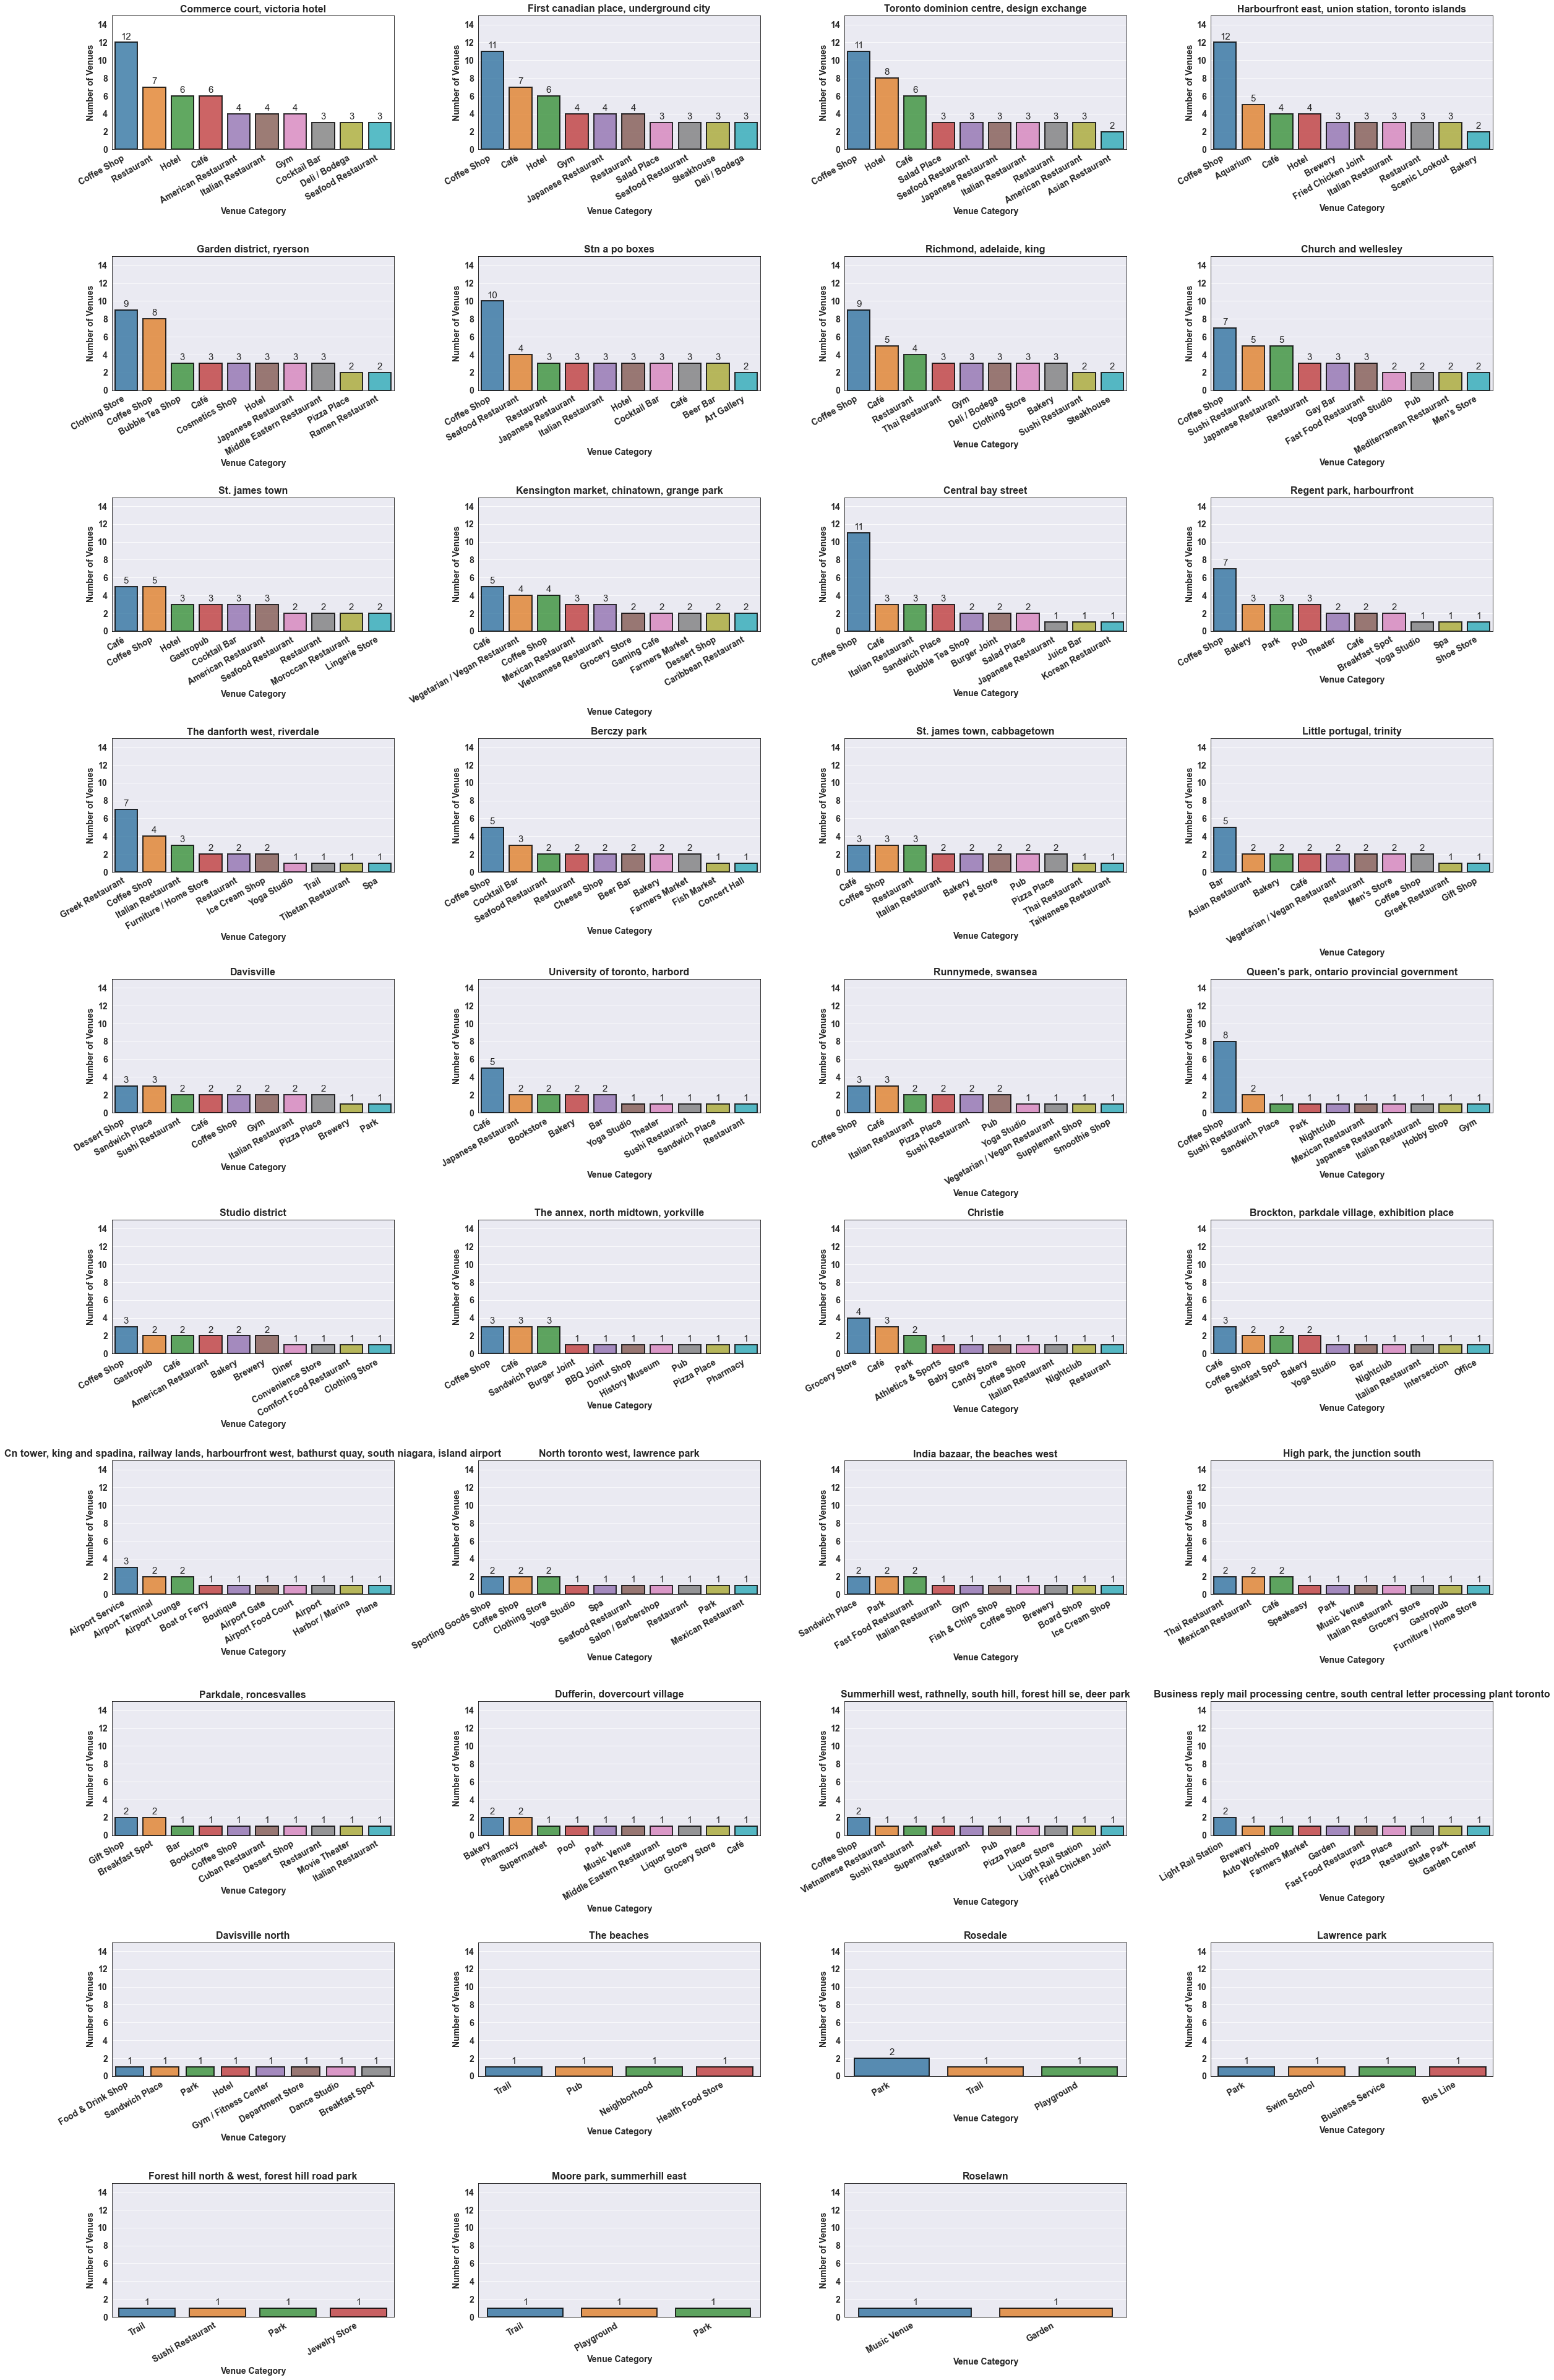

In [31]:
#  Categorical Data
a = 20  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

Neighbourhood_List = Number_of_Venues_df['Neighbourhood'].unique().tolist()

fig = plt.figure()
fig.set_figheight(140)
fig.set_figwidth(40)

for Neighbourhood in Neighbourhood_List:
    plt.subplot(a, b, c)
    plt.title(Neighbourhood.capitalize(),fontsize=16,weight='bold')
    plt.xlabel('Venue Category',fontsize=14, weight='bold')
    plt.ylabel('Number of Venues',fontsize=14, weight='bold')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.8)
    plt.xticks(rotation=30, ha='right',fontsize=14, weight='bold')
    plt.yticks(fontsize=14, weight = 'bold')
    plt.ylim(0,15)
    sub = Number_of_Venues_df[Number_of_Venues_df['Neighbourhood'] == Neighbourhood]
    BarplotFigure = sns.barplot(y='Number of Venues',x='Venue Category',data=sub, alpha=0.8,edgecolor="black",linewidth=2)
    sns.set_style("darkgrid",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
    for p in BarplotFigure.patches:
        BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    c = c + 1

plt.show()

#### **Showing the amount of Clothing Stores per Neighbourhood**

Let's say I am interested in what Neighborhoods have a variety of Clothing Stores. <br />
Below syntax is used to plot the number of Clothing Stores per Neighborhood in a Bar chart. <br />
As can be seen most Clothing Stores seem to be in the neighbourhood "Garden District, Ryerson".

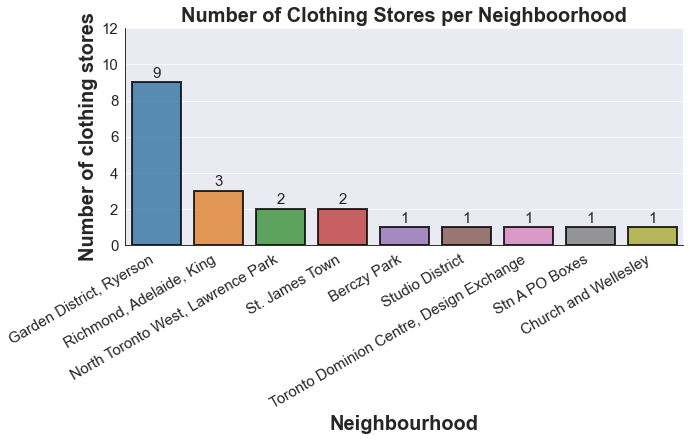

In [32]:
# Create a new dataframe, filtering the column "Venue Category" for venue "Clothing Store"
Filtered_df = Toronto_filtered_nearby_venues_df[Toronto_filtered_nearby_venues_df['Venue Category'] == 'Clothing Store']

# Count the amount of Neighbourhoods 
Counted_Categories = Filtered_df['Neighbourhood'].value_counts()
Counted_Categories = Counted_Categories[:40,]

# Plot the count Neighbourhoods in a Bar Chart
plt.figure(figsize=(10,4))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Number of Clothing Stores per Neighboorhood',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, ha='right',fontsize=15)
plt.xlabel('Neighbourhood',fontsize=20, weight = 'bold')
plt.ylabel('Number of clothing stores',fontsize=20, weight = 'bold')
plt.ylim(0,12)
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()

# **Assignment 3: Cluster the neighbourhoods in Toronto and explore the clusters**

Now that we have explored the dataset of Toronto City, let's cluster the dataset into 5 clusters. <br />
In the following step 5 clusters are created and visualized on a map using the folium library.

### **Step 3.8: Cluster the neighbourhoods in Toronto City**

#### **Import the required libraries**

In [33]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import matplotlib.pyplot as plt # plotting library

# backend for rendering plots within the browser
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
print('Libraries imported.')

Libraries imported.


#### **For Clustering we will be using the "Toronto_filtered_nearby_venues_df" that was created in step assignment step 3.7 above**

Let's first visualize the dataframe "Toronto_filtered_nearby_venues_df":

In [34]:
Toronto_filtered_nearby_venues_df.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  Regent Park, Harbourfront                43.65426               -79.360636   
1  Regent Park, Harbourfront                43.65426               -79.360636   
2  Regent Park, Harbourfront                43.65426               -79.360636   
3  Regent Park, Harbourfront                43.65426               -79.360636   
4  Regent Park, Harbourfront                43.65426               -79.360636   

                    Venue  Venue Latitude  Venue Longitude  \
0           Tandem Coffee       43.653559       -79.361809   
1        Roselle Desserts       43.653447       -79.362017   
2  Cooper Koo Family YMCA       43.653249       -79.358008   
3     Body Blitz Spa East       43.654735       -79.359874   
4          Impact Kitchen       43.656369       -79.356980   

        Venue Category  
0          Coffee Shop  
1               Bakery  
2  Distribution Center  
3                  Spa  
4           Restaurant

#### **Add the columns "PostalCode" and "Borough"**

In [35]:
Toronto_Borough_and_Postal_Codes = Toronto_filtered_df[['PostalCode','Borough','Neighbourhood']].copy()
Toronto_Cluster_df = pd.merge(Toronto_Borough_and_Postal_Codes,Toronto_filtered_nearby_venues_df,on='Neighbourhood')
Toronto_Cluster_df

PostalCode           Borough  \
0           M5A  Downtown Toronto   
1           M5A  Downtown Toronto   
2           M5A  Downtown Toronto   
3           M5A  Downtown Toronto   
4           M5A  Downtown Toronto   
...         ...               ...   
1600        M7Y      East Toronto   
1601        M7Y      East Toronto   
1602        M7Y      East Toronto   
1603        M7Y      East Toronto   
1604        M7Y      East Toronto   

                                          Neighbourhood  \
0                             Regent Park, Harbourfront   
1                             Regent Park, Harbourfront   
2                             Regent Park, Harbourfront   
3                             Regent Park, Harbourfront   
4                             Regent Park, Harbourfront   
...                                                 ...   
1600  Business reply mail Processing Centre, South C...   
1601  Business reply mail Processing Centre, South C...   
1602  Business reply mail Processing Centre, South C...   
1603  Business reply mail Processing Centre, South C...   
1604  Business reply mail Processing Centre, South C...   

      Neighbourhood Latitude  Neighbourhood Longitude  \
0                  43.654260               -79.360636   
1                  43.654260               -79.360636   
2                  43.654260               -79.360636   
3                  43.654260               -79.360636   
4                  43.654260               -79.360636   
...                      ...                      ...   
1600               43.662744               -79.321558   
1601               43.662744               -79.321558   
1602               43.662744               -79.321558   
1603               43.662744               -79.321558   
1604               43.662744               -79.321558   

                        Venue  Venue Latitude  Venue Longitude  \
0               Tandem Coffee       43.653559       -79.361809   
1            Roselle Desserts       43.653447       -79.362017   
2      Cooper Koo Family YMCA       43.653249       -79.358008   
3         Body Blitz Spa East       43.654735       -79.359874   
4              Impact Kitchen       43.656369       -79.356980   
...                       ...             ...              ...   
1600     The Ashbridge Estate       43.664691       -79.321805   
1601     TTC Russell Division       43.664908       -79.322560   
1602  Jonathan Ashbridge Park       43.664702       -79.319898   
1603             The Ten Spot       43.664815       -79.324213   
1604          TTC Stop #03049       43.664470       -79.325145   

           Venue Category  
0             Coffee Shop  
1                  Bakery  
2     Distribution Center  
3                     Spa  
4              Restaurant  
...                   ...  
1600               Garden  
1601   Light Rail Station  
1602                 Park  
1603                  Spa  
1604   Light Rail Station  

[1605 rows x 9 columns]

#### **Create cluster labels and include in the dataframe above**

In [36]:
# Set the number of clusters
k=5

# Create new dataframe in which the categorical variables are removed
Clustering_df = Toronto_Cluster_df.drop(['PostalCode','Borough','Neighbourhood','Venue','Venue Category'],1)

# Run k-means clustering on the created dataframe
kmeans = KMeans(n_clusters = k,random_state=0).fit(Clustering_df)

# Check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 3, 3, 3])

#### **Insert the clusters in the dataframe "Toronto_Cluser_df"**

In [37]:
# Insert the clusters in the dataframe "Toronto_filtered_df"
Toronto_Cluster_df.insert(0, 'Cluster Labels', labels)

In [38]:
# Show dataframe including Cluster Labels
Toronto_Cluster_df.sort_values(by=['Cluster Labels'], ascending = True, inplace = True)
Toronto_Cluster_df.reset_index(drop = True, inplace = True)
Toronto_Cluster_df

Cluster Labels PostalCode           Borough  \
0                  0        M5A  Downtown Toronto   
1                  0        M5K  Downtown Toronto   
2                  0        M5K  Downtown Toronto   
3                  0        M5K  Downtown Toronto   
4                  0        M5K  Downtown Toronto   
...              ...        ...               ...   
1600               4        M5S  Downtown Toronto   
1601               4        M5S  Downtown Toronto   
1602               4        M5S  Downtown Toronto   
1603               4        M5S  Downtown Toronto   
1604               4        M6K      West Toronto   

                                     Neighbourhood  Neighbourhood Latitude  \
0                        Regent Park, Harbourfront               43.654260   
1         Toronto Dominion Centre, Design Exchange               43.647177   
2         Toronto Dominion Centre, Design Exchange               43.647177   
3         Toronto Dominion Centre, Design Exchange               43.647177   
4         Toronto Dominion Centre, Design Exchange               43.647177   
...                                            ...                     ...   
1600                University of Toronto, Harbord               43.662696   
1601                University of Toronto, Harbord               43.662696   
1602                University of Toronto, Harbord               43.662696   
1603                University of Toronto, Harbord               43.662696   
1604  Brockton, Parkdale Village, Exhibition Place               43.636847   

      Neighbourhood Longitude                                    Venue  \
0                  -79.360636                            Tandem Coffee   
1                  -79.381576                  Royal Alexandra Theatre   
2                  -79.381576                Delta Toronto Club Lounge   
3                  -79.381576  Cosmopolitan Toronto Centre Hotel & Spa   
4                  -79.381576                            Biff's Bistro   
...                       ...                                      ...   
1600               -79.400049         Her Father's Cider Bar + Kitchen   
1601               -79.400049                              Piano Piano   
1602               -79.400049                    Sivananda Yoga Centre   
1603               -79.400049                      The Dessert Kitchen   
1604               -79.428191                        The Remix Project   

      Venue Latitude  Venue Longitude         Venue Category  
0          43.653559       -79.361809            Coffee Shop  
1          43.647255       -79.387530                Theater  
2          43.643085       -79.383885              Roof Deck  
3          43.649064       -79.377598                  Hotel  
4          43.647085       -79.376342      French Restaurant  
...              ...              ...                    ...  
1600       43.662448       -79.404703               Beer Bar  
1601       43.662949       -79.402898     Italian Restaurant  
1602       43.662754       -79.402951            Yoga Studio  
1603       43.662823       -79.402746           Dessert Shop  
1604       43.636491       -79.422513  Performing Arts Venue  

[1605 rows x 10 columns]

#### **Visualize the clusters and Venue locations on the map**

In [39]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        Toronto_Cluster_df['Venue Latitude'], 
        Toronto_Cluster_df['Venue Longitude'], 
        Toronto_Cluster_df['Neighbourhood'], 
        Toronto_Cluster_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

# resize image and remove white space
from branca.element import Figure
fig = Figure(width=1000, height=800)
fig.add_child(map_clusters)
       
map_clusters

### **Step 3.9: Examine each cluster** 

The clusters have been created in previous step. <br />
Below, bar charts are created for each of the 5 clusters (0 to 4) in above map <br />
Each bar chart shows the number of Venue Categories in each cluster. <br />

#### **Showing the venues for cluster 0, borough "Downtown Toronto"**

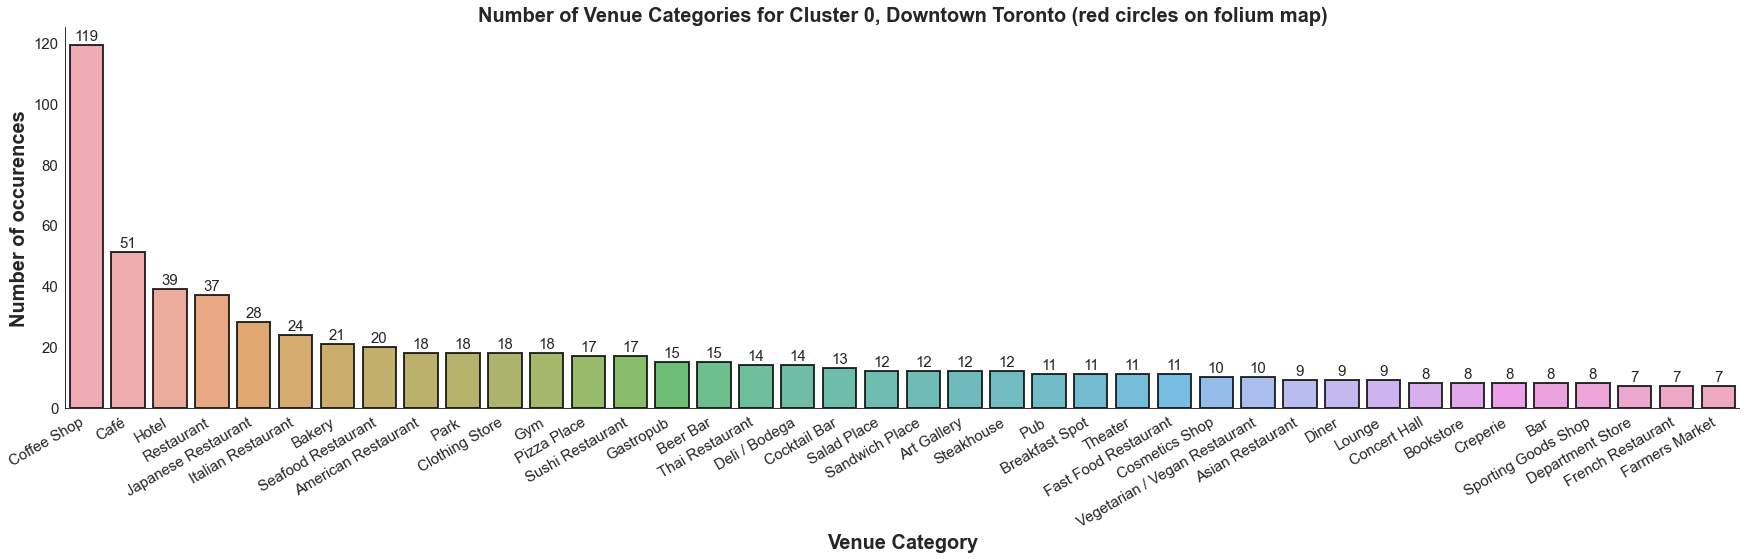

In [40]:
# Count number of Venue Categories
Cluster_0_df = Toronto_Cluster_df[Toronto_Cluster_df['Cluster Labels']== 0]
Counted_Categories = Cluster_0_df['Venue Category'].value_counts()
Counted_Categories = Counted_Categories[:40,]

# Create Bar Chart with counted number of Venue Categories
plt.figure(figsize=(30,7))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Number of Venue Categories for Cluster 0, Downtown Toronto (red circles on folium map)',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, ha='right',fontsize=15)
plt.xlabel('Venue Category',fontsize=20, weight = 'bold')
plt.ylabel('Number of occurences',fontsize=20, weight = 'bold')
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()

#### **Showing the venues for cluster 1, borough "West Toronto"**

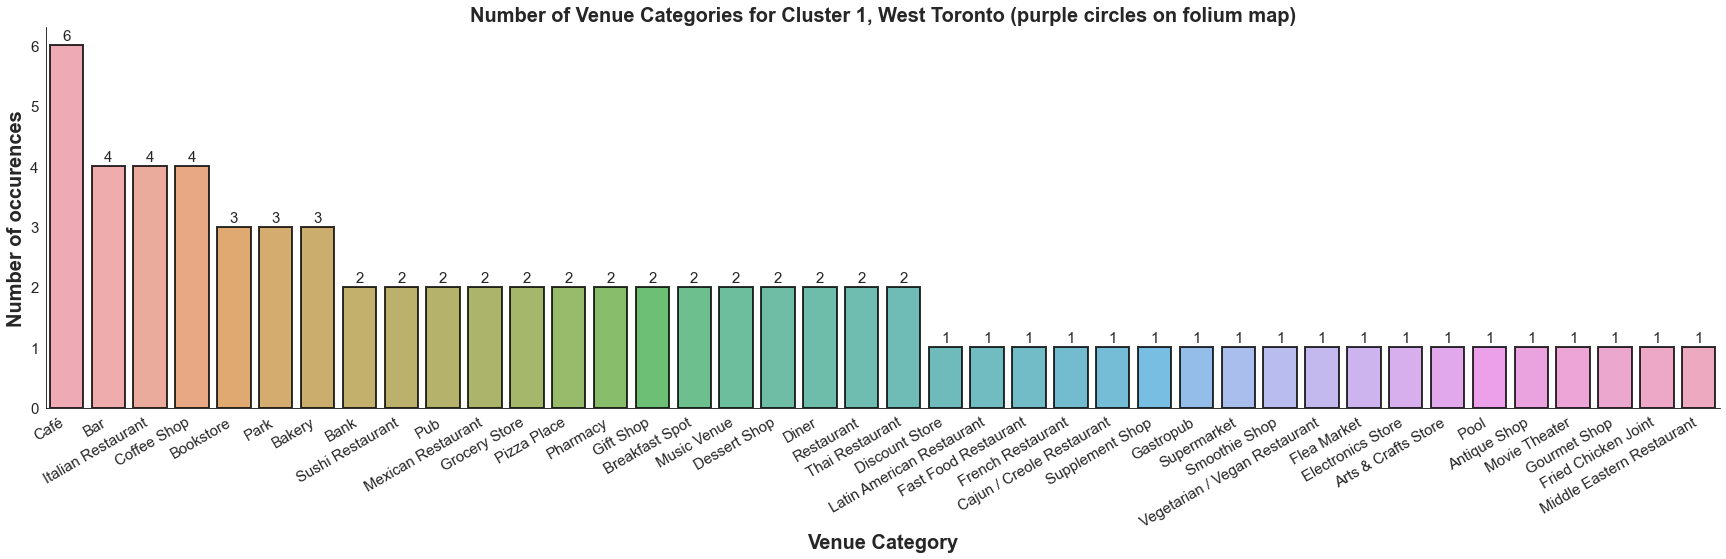

In [41]:
# Count number of Venue Categories
Cluster_1_df = Toronto_Cluster_df[Toronto_Cluster_df['Cluster Labels']== 1]
Counted_Categories = Cluster_1_df['Venue Category'].value_counts()
Counted_Categories = Counted_Categories[:40,]

# Create Bar Chart with counted number of Venue Categories
plt.figure(figsize=(30,7))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Number of Venue Categories for Cluster 1, West Toronto (purple circles on folium map)',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, ha='right',fontsize=15)
plt.xlabel('Venue Category',fontsize=20, weight = 'bold')
plt.ylabel('Number of occurences',fontsize=20, weight = 'bold')
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()

#### **Showing the venues for cluster 2, borough "Central Toronto" and "Downtown Toronto**

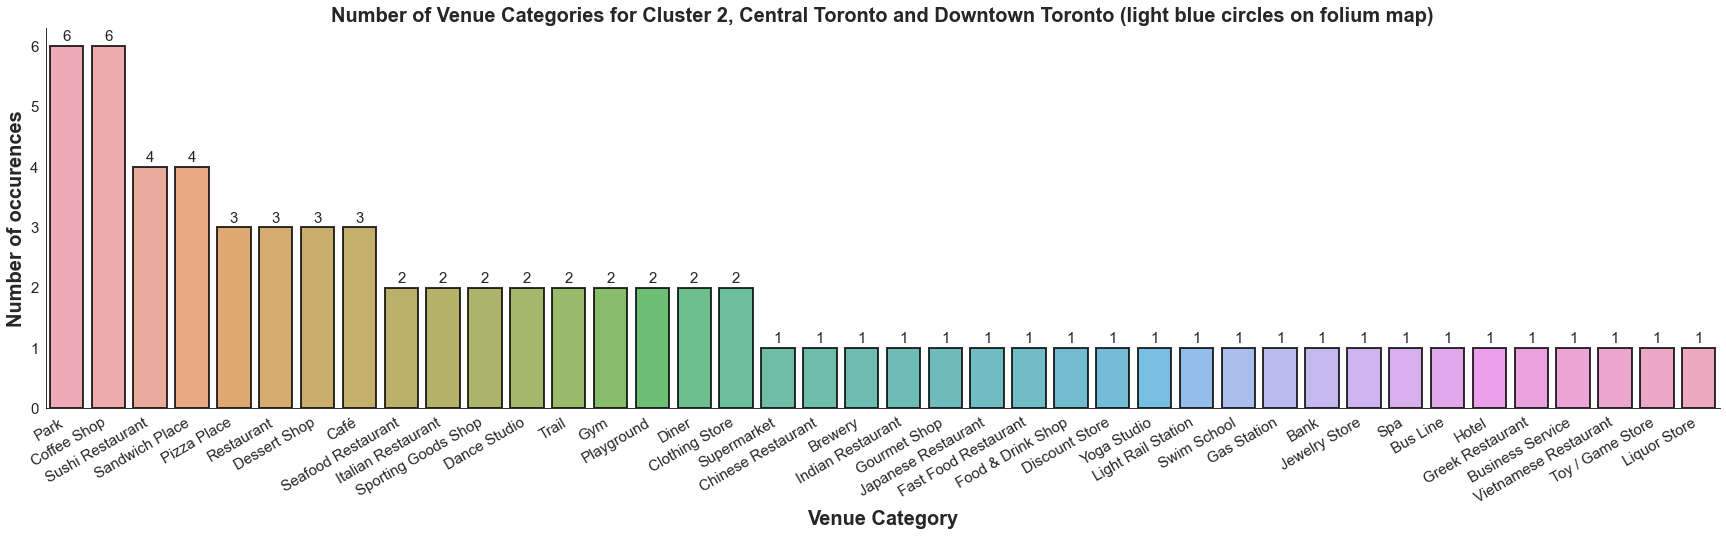

In [42]:
# Count number of Venue Categories
Cluster_2_df = Toronto_Cluster_df[Toronto_Cluster_df['Cluster Labels']== 2]
Counted_Categories = Cluster_2_df['Venue Category'].value_counts()
Counted_Categories = Counted_Categories[:40,]

# Create Bar Chart with counted number of Venue Categories
plt.figure(figsize=(30,7))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Number of Venue Categories for Cluster 2, Central Toronto and Downtown Toronto (light blue circles on folium map)',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, ha='right',fontsize=15)
plt.xlabel('Venue Category',fontsize=20, weight = 'bold')
plt.ylabel('Number of occurences',fontsize=20, weight = 'bold')
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()

#### **Showing the venues for cluster 3, borough "Central Toronto" and "Downtown Toronto" and "West toronto"**

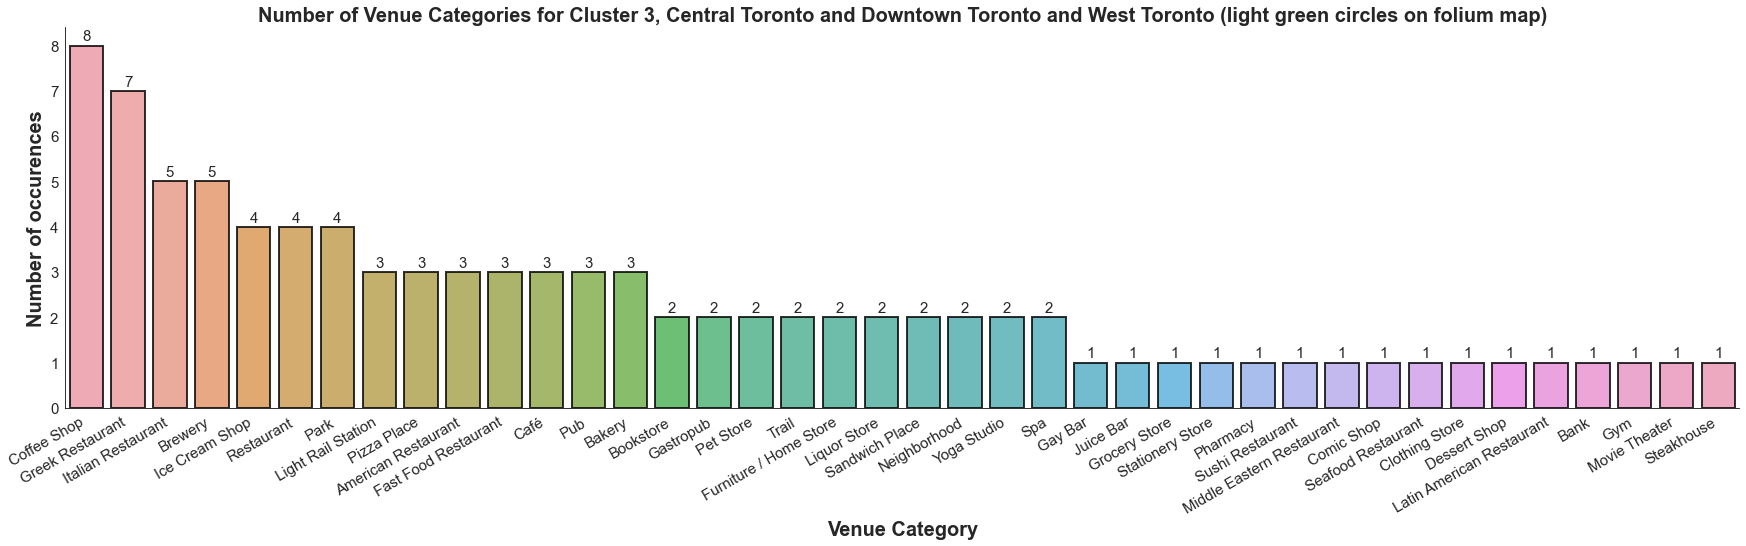

In [43]:
# Count number of Venue Categories
Cluster_3_df = Toronto_Cluster_df[Toronto_Cluster_df['Cluster Labels']== 3]
Counted_Categories = Cluster_3_df['Venue Category'].value_counts()
Counted_Categories = Counted_Categories[:40,]

# Create Bar Chart with counted number of Venue Categories
plt.figure(figsize=(30,7))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Number of Venue Categories for Cluster 3, Central Toronto and Downtown Toronto and West Toronto (light green circles on folium map)',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, ha='right',fontsize=15)
plt.xlabel('Venue Category',fontsize=20, weight = 'bold')
plt.ylabel('Number of occurences',fontsize=20, weight = 'bold')
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()

#### **Showing the venues for cluster 4, borough "East Toronto"**

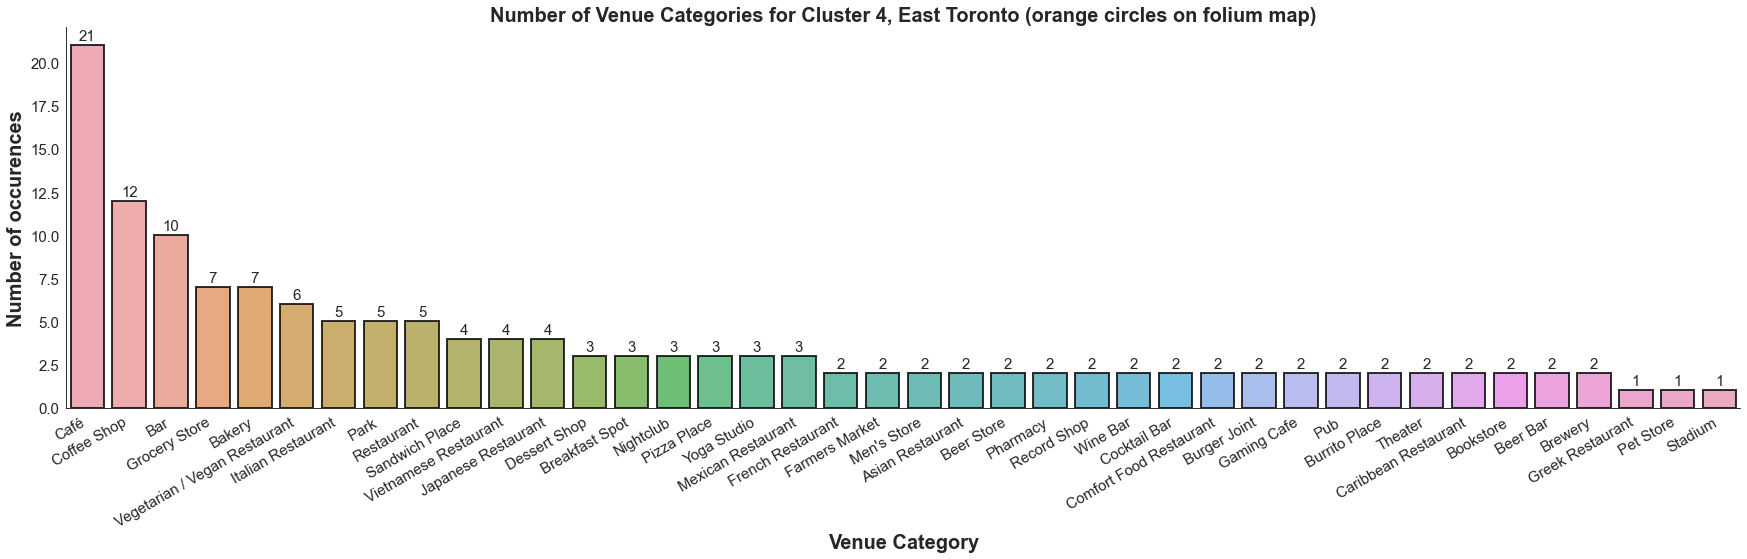

In [44]:
# Count number of Venue Categories
Cluster_4_df = Toronto_Cluster_df[Toronto_Cluster_df['Cluster Labels']== 4]
Counted_Categories = Cluster_4_df['Venue Category'].value_counts()
Counted_Categories = Counted_Categories[:40,]

# Create Bar Chart with counted number of Venue Categories
plt.figure(figsize=(30,7))
BarplotFigure = sns.barplot(Counted_Categories.index,Counted_Categories.values,alpha=0.8,edgecolor="black",linewidth=2)
for p in BarplotFigure.patches:
    BarplotFigure.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Number of Venue Categories for Cluster 4, East Toronto (orange circles on folium map)',fontsize = 20, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, ha='right',fontsize=15)
plt.xlabel('Venue Category',fontsize=20, weight = 'bold')
plt.ylabel('Number of occurences',fontsize=20, weight = 'bold')
sns.despine()
sns.set_style("white",{'axes.linewidth': 5, 'axes.edgecolor':'black'})
sns.axes_style()
plt.show()